### Coding Assignment: Train deep MLP to perform regression task to predict price basedon California housing dataset
#### Problem #4

Try tuning parameters, layers, neurons, activation functions, learning rate, etc. Find your best tuned model and plot learning curves, as we show at our coding demo during class.

### Import necessary packages and california housing dataset

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn.datasets.california_housing import fetch_california_housing
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from scipy import stats
%matplotlib inline

In [52]:
import numpy as np
import os
import tarfile
from sklearn.externals import joblib
from sklearn.datasets.base import _pkl_filepath, get_data_home

archive_path = "cal_housing.tgz" # change the path if it's not in the current directory
data_home = get_data_home(data_home=None) # change data_home if you are not using ~/scikit_learn_data
if not os.path.exists(data_home):
    os.makedirs(data_home)
filepath = _pkl_filepath(data_home, 'cal_housing.pkz')

with tarfile.open(mode="r:gz", name=archive_path) as f:
    cal_housing = np.loadtxt(
        f.extractfile('CaliforniaHousing/cal_housing.data'),
        delimiter=',')
    # Columns are not in the same order compared to the previous
    # URL resource on lib.stat.cmu.edu
    columns_index = [8, 7, 2, 3, 4, 5, 6, 1, 0]
    cal_housing = cal_housing[:, columns_index]

    joblib.dump(cal_housing, filepath, compress=6)

### View and Process Data 

In [53]:
housing = fetch_california_housing()

In [54]:
calf_hous_df = pd.DataFrame(data= housing.data, columns=housing.feature_names)    
calf_hous_df.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [55]:
round(calf_hous_df.describe(),3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000,20640.000,20640.000,20640.000,20640.000,20640.000,20640.000,20640.000
mean,3.871,28.639,5.429,1.097,1425.477,3.071,35.632,-119.570
std,1.900,12.586,2.474,0.474,1132.462,10.386,2.136,2.004
min,0.500,1.000,0.846,0.333,3.000,0.692,32.540,-124.350
25%,2.563,18.000,4.441,1.006,787.000,2.430,33.930,-121.800
50%,3.535,29.000,5.229,1.049,1166.000,2.818,34.260,-118.490
75%,4.743,37.000,6.052,1.100,1725.000,3.282,37.710,-118.010
max,15.000,52.000,141.909,34.067,35682.000,1243.333,41.950,-114.310


In [56]:
calf_hous_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
MedInc        20640 non-null float64
HouseAge      20640 non-null float64
AveRooms      20640 non-null float64
AveBedrms     20640 non-null float64
Population    20640 non-null float64
AveOccup      20640 non-null float64
Latitude      20640 non-null float64
Longitude     20640 non-null float64
dtypes: float64(8)
memory usage: 1.3 MB


In [57]:
calf_hous_df.shape

(20640, 8)

In [58]:
calf_hous_df.isna().sum() # no nulls

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [59]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target) 
# split into training and test set

In [60]:
X_train_full.shape

(15480, 8)

In [61]:
X_test.shape

(5160, 8)

In [62]:
# split full training set into training and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,y_train_full) 

In [63]:
# Standardize datasets
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

In [64]:
import tensorflow as tf
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.models import Sequential

###  Create and Train a Model

In [65]:
# Create a model
model = Sequential([
    layers.Dense(32,activation = "relu",input_shape= X_train.shape[1:]),
    layers.Dense(32,activation = "relu"),
    layers.Dense(32,activation = "relu"),
    layers.Dense(10,activation = "relu"),
    layers.Dense(1)])

 # regression uses no activation function; predicting only single value 

In [66]:
# Compile a model
model.compile(loss="mse",optimizer="sgd",metrics = ['mae'])

In [67]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_12 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_13 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                330       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 11        
Total params: 2,741
Trainable params: 2,741
Non-trainable params: 0
_________________________________________________________________


In [68]:
history = model.fit(X_train, y_train, epochs= 20, batch_size = 32, validation_data = (X_valid,y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 88us/step - loss: 0.8165 - mean_absolute_error: 0.6414 - val_loss: 0.4737 - val_mean_absolute_error: 0.5011
Epoch 2/20
11610/11610 [==============================] - 1s 58us/step - loss: 0.4474 - mean_absolute_error: 0.4784 - val_loss: 0.5023 - val_mean_absolute_error: 0.5080
Epoch 3/20
11610/11610 [==============================] - 1s 59us/step - loss: 0.4366 - mean_absolute_error: 0.4739 - val_loss: 0.4285 - val_mean_absolute_error: 0.4601
Epoch 4/20
11610/11610 [==============================] - 1s 60us/step - loss: 0.3990 - mean_absolute_error: 0.4528 - val_loss: 0.4174 - val_mean_absolute_error: 0.4572
Epoch 5/20
11610/11610 [==============================] - 1s 61us/step - loss: 0.3819 - mean_absolute_error: 0.4402 - val_loss: 0.4007 - val_mean_absolute_error: 0.4459
Epoch 6/20
11610/11610 [==============================] - 1s 60us/step - loss: 0.3600 - mean_absolute_erro

### Test Model and Predictions

In [69]:
test_loss, test_mae = model.evaluate(X_test, y_test) # metrics
print('test_mae:', test_mae)
print('test_loss:', test_loss)

5160/5160 [==============================] - 0s 23us/step
test_mae: 0.39407791994338814
test_loss: 0.33058933412381847


In [70]:
y_pred = model.predict(X_test) # print predicted labels for X_test

### Evaluate Model Using Regression metrics such as: MSE, RMSE, & MAE

In [71]:
from sklearn.metrics import mean_squared_error,roc_auc_score
from sklearn.metrics import accuracy_score,confusion_matrix, mean_absolute_error  # compare predicted labels and true labels

#### Mean Squared Error (MSE)

In [72]:
#Mean square error is always positive and a value closer 
#to 0 or a lower value is better. Let’s see how this this is calculated;
#The measure gives an idea of the magnitude of the error, 
#but no idea of the direction (e.g. over or under predicting).

print('Mean Square Error:',round(mean_squared_error(y_pred,y_test),3))

Mean Square Error: 0.331


#### Root Mean Squared Error (RMSE)

In [73]:
#RMSE is the standard deviation of error (residual error). It indicates the spread of the residual errors. 
#It is always positive, and a lower value indicates better performance. 
#Ideal value would be 0 but it is never achieved.

print('Root Mean Square error:',round(np.sqrt(mean_squared_error(y_test, y_pred)),3))

Root Mean Square error: 0.575


#### Mean Absolute Error (MAE)

In [74]:
# MAE is the sum of absolute differences between actual 
# and predicted values. It only considers the magnitude of the error, 
# it doesn’t consider the direction, that is, positive or negative

print('Mean Absolute error:',round(mean_absolute_error(y_test, y_pred),3))

Mean Absolute error: 0.394


### Plot Learning Curves

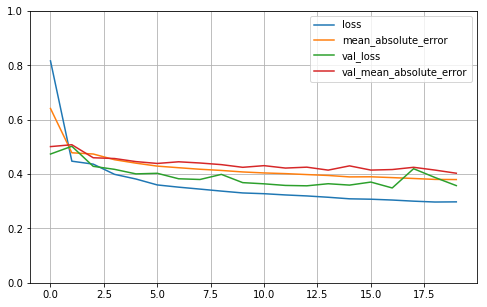

In [75]:
# Learning Curve Plot
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # set vertical range to [0,-1]
plt.show() 

For the best tuned model, I included more hidden layers with less amount of neurons. I then trained the network using a higher number of epochs and small batch size. The optimizer i used was sgd, it worked the best. The metrics I used were mean absolute error (MAE) and loss funcion mse (mean standard error) as this is a regression problem. No activiation function was used in the output layer because regression problems do not require it because no transformation of numerical value is necessary (linear activation). My error had significantly reduced after applying tuning my model in this manner.